In [ ]:
 !pip install tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
# import basic library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset=pd.read_csv('Churn_Modelling.csv')

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Divide the dataset into independent and dependent features
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
# feature engineering
pd.get_dummies(X['Geography'],drop_first=True)

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [ ]:
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
# concatenate these varia\ables with dataframe
X=X.drop(['Geography','Gender'],axis=1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
pd.concat([X,geography,gender],axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [ ]:
X=pd.concat([X,geography,gender],axis=1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
# train test split , spliiting the dataset into training and test set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
# part 2 now lets create ANN
# we are going to use tensorflow library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
# let initailize the ANN
classifiers=Sequential()


In [ ]:
# adding the input layer
classifiers.add(Dense(units=11,activation='relu'))

In [ ]:
# adding the first hidden layer
classifiers.add(Dense(units=7,activation='relu'))
# classifiers.add(Dropout(0.2))

In [ ]:
# adding the second hidden layer
classifiers.add(Dense(units=6,activation='relu'))
# classifiers.add(Dropout(0.3))

In [ ]:
# adding the output layer
classifiers.add(Dense(1,activation='sigmoid'))

In [ ]:
classifiers.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
# early stopping
import tensorflow as tf

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
from sklearn.utils import validation


In [ ]:
model_history=classifiers.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 8s 8ms/step - loss: 0.4741 - accuracy: 0.8197 - val_loss: 0.4144 - val_accuracy: 0.8482
Epoch 2/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.4564 - accuracy: 0.8192 - val_loss: 0.4542 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.4559 - accuracy: 0.8209 - val_loss: 0.4250 - val_accuracy: 0.7955
Epoch 4/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.4592 - accuracy: 0.8168 - val_loss: 0.4107 - val_accuracy: 0.7955
Epoch 5/1000
536/536 [==============================] - 4s 8ms/step - loss: 0.4488 - accuracy: 0.8225 - val_loss: 0.3912 - val_accuracy: 0.8421
Epoch 6/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.4516 - accuracy: 0.8231 - val_loss: 0.3907 - val_accuracy: 0.8463
Epoch 7/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.4508 - accuracy: 0.8207 - val_loss: 0.4278 - val_accuracy:

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

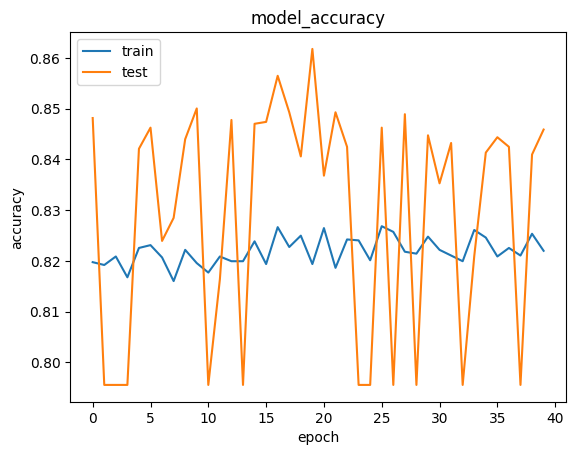

In [ ]:
# summarize history for the accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

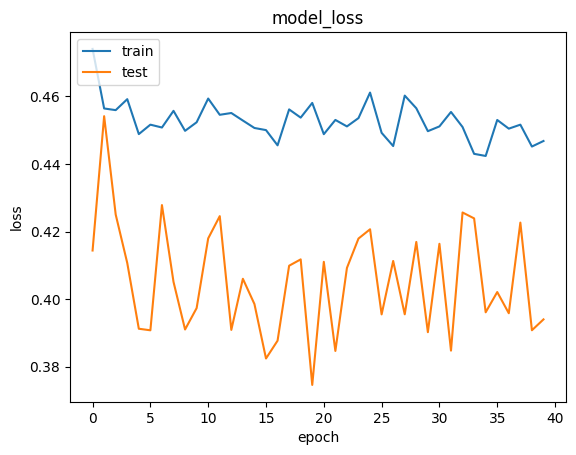

In [ ]:
# summarize history for the loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show

In [ ]:
# part 3 - making the predictions and evaluating the model
#  predicting the test set results
y_pred=classifiers.predict(X_test)
y_pred=(y_pred >=0.5)


63/63 [==============================] - 0s 2ms/step


In [ ]:
# make the onfusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1536,   59],
       [ 216,  189]])

In [ ]:
# calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred, y_test)

In [ ]:
score

0.8625

In [ ]:
# get the weights
classifiers.get_weights()

[array([[ 0.41480574, -0.0087658 ,  0.0270437 ,  0.20590469,  0.479513  ,
         -0.21410833, -0.86138535,  0.3130663 ,  0.0436799 , -0.11566284,
         -0.36316878],
        [-0.6226663 ,  0.12558666, -2.7173104 ,  2.1205704 ,  0.04709513,
          0.19129936, -0.6755883 , -1.8841896 , -0.06697135,  0.9582182 ,
          1.0865391 ],
        [-0.11570399,  1.0056825 ,  0.25415355,  0.08411611,  0.47123048,
         -0.79208106,  0.1936498 , -0.16905183,  0.23302086, -0.01381456,
          0.6398148 ],
        [-1.9839213 ,  0.4139597 , -0.07779187, -1.285312  , -1.1846906 ,
          0.44672954, -1.2002982 , -1.5666927 , -2.8310294 ,  0.4042386 ,
         -0.8183762 ],
        [-0.21091388,  2.5377746 ,  0.24674168,  0.45765343, -1.0158105 ,
          2.7645648 , -2.0685482 ,  0.09645296, -2.9752853 , -1.7917578 ,
         -0.28571206],
        [-1.138994  , -0.38962942, -0.14904319, -0.33272746, -0.6630722 ,
         -0.23516871, -0.09985598,  1.0656985 ,  0.08329628, -0.4259204